TESTOWY NOTEBOOK

Import Bibliotek

In [1]:
import tensorflow as tf
import numpy as np
import pathlib

In [8]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

print(tf.__version__)

2.16.1


In [20]:
# Definicja zmiennych
batch_size = 32
img_height = 256
img_width = 256

# train_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\\train")
# test_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\\test")

train_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\small_ds")
# test_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\small_ds")


In [22]:
# Ładowanie datasetu do nauki
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 971 files belonging to 2 classes.
Using 777 files for training.


In [23]:
# Ładowanie datasetu do testów
test_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 971 files belonging to 2 classes.
Using 194 files for validation.


In [24]:
# Pobranie listy klas datasetu
class_names = train_ds.class_names
print(class_names)

['AiArtData', 'RealArt']


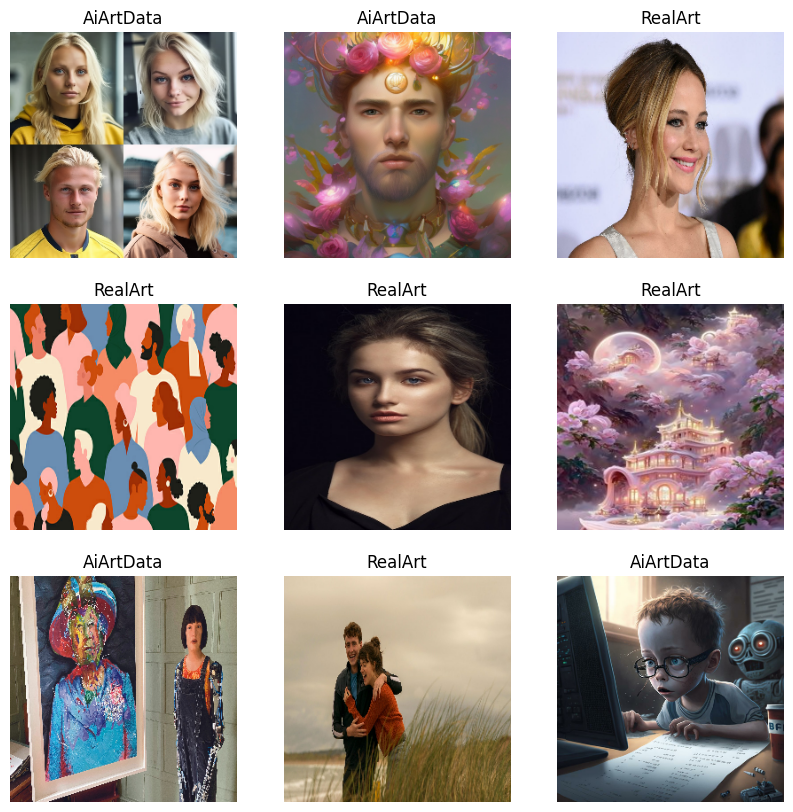

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [27]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 0.99823797


In [28]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


In [29]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = normalized_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [31]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [34]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.5392 - loss: 0.6916 - val_accuracy: 0.6082 - val_loss: 0.7756
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.5392 - loss: 0.6906 - val_accuracy: 0.6082 - val_loss: 0.7707
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.5392 - loss: 0.6905 - val_accuracy: 0.6082 - val_loss: 0.7712
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.5392 - loss: 0.6904 - val_accuracy: 0.6082 - val_loss: 0.7715
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.5392 - loss: 0.6904 - val_accuracy: 0.6082 - val_loss: 0.7716
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.5392 - loss: 0.6904 - val_accuracy: 0.6082 - val_loss: 0.7717
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.5392 - loss: 0.6904 - val_accuracy: 0.6082 - val_loss: 0.7719
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.5392 - loss: 0.6903 - val_accuracy: 0.

In [38]:
test_loss, test_accuracy = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6043 - loss: 0.7749
